Vamos dar uma olhada em um primeiro exemplo concreto de uma rede neural, que faz uso da biblioteca [Python Keras](https://keras.io/).


Keras é um ***framework*** de aprendizado profundo para Python que fornece uma maneira conveniente de definir e treinar quase qualquer tipo de modelo de aprendizado profundo. O Keras foi desenvolvido inicialmente para pesquisadores, com o objetivo de permitir uma experimentação rápida.

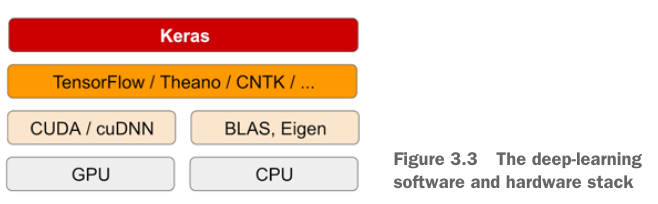


---

Keras é uma ***model-level library***, que fornece blocos de construção de alto nível para desenvolver modelos DL. 

Ele não lida com operações de baixo nível, como manipulação e diferenciação de tensores. Em vez disso, ele conta com uma biblioteca de tensores especializada e bem otimizada para fazer isso, servindo como o mecanismo de back-end do Keras.

---


Recursos Principais do Keras:

* Permite que o mesmo código seja executado perfeitamente na CPU ou GPU.
* Tem uma API que facilita a prototipagem rápida de DL, incluíndo redes convolucionais (para visão computacional), redes recorrentes (para processamento de sequências) e qualquer combinação de ambas.
* Suporta para arquiteturas de rede arbitrárias: modelos de múltiplas entradas ou saídas, compartilhamento de camadas, compartilhamento de modelos e assim por diante.

Keras é distribuído sob a licença permissiva do MIT, o que significa que pode ser usado livremente em projetos comerciais.

---


In [2]:
import keras
import tensorflow as tf
print(keras.__version__)

print(keras.backend.backend())

2.5.0
tensorflow


## Anatomia de uma rede neural com Keras

Primeiro Exemplo: classificar dígitos do MNIST com uma rede rasa (MLP). 

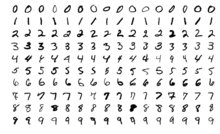


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist


# O conjunto de dados MNIST vem pré-carregado no Keras, na forma de um conjunto de quatro matrizes Numpy
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [4]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


<function matplotlib.pyplot.show>

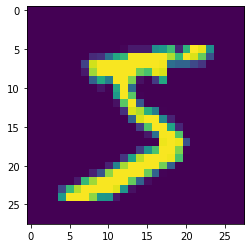

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.show


---

Nosso fluxo de trabalho será o seguinte: 

1. Apresentaremos nossa rede neural com os dados de treinamento, train_images e train_labels.
2. A rede aprenderá a associar imagens e rótulos.
3. Pediremos à rede para produzir previsões para test_images e verificaremos se essas previsões correspondem aos rótulos de test_labels.

In [6]:
from keras import models
from keras import layers

network = models.Sequential()

network.add(layers.Dense( 512, activation='sigmoid', input_shape=(28*28,)) )
network.add(layers.Dense(10, activation='softmax'))

In [7]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Modelo criado**

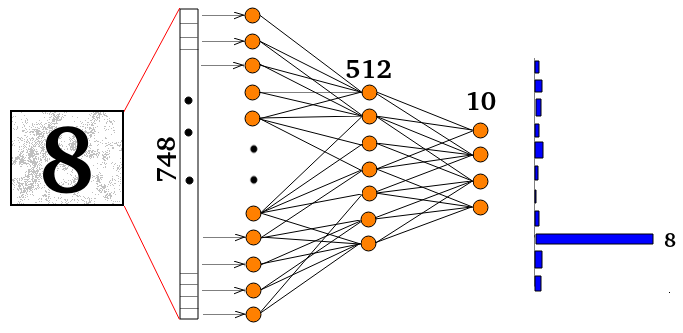

**Layer**

O elemento central das redes neurais é a **camada**, um módulo de processamento de dados que você pode conceber como um **filtro** de informações. 


**Camadas:** extraem representações dos dados, que com sorte, são mais significativas para resolver a classificação. 

A maior parte de DL consiste realmente em encadear camadas simples que implementarão uma forma de **destilação de dados** progressiva. 

Um modelo de aprendizado profundo é como uma peneira para processamento de dados, feita de uma sucessão de filtros cada vez mais refinados.

---


### Softmax

A segunda (e última) camada é uma camada **softmax** de 10 vias, o que significa que ela retornará um vetor de 10 valores de probabilidade (somando 1). 

Cada elemento do vetor será a probabilidade de que a imagem do dígito atual pertença a das 10 classes.

Função Softmax é uma exponencial normalizada, $\sigma(\textbf{x}):\mathbb{R}^K \to \mathbb{R}^K$:

$\sigma(\textbf{x})_i = \frac{e^{x_i}}{\sum_j^K e^x_j}$, 

para $i=1,\dots,K$ e $\textbf{x} = [x_1,\dots,x_K] \in \mathbb{R}^K$

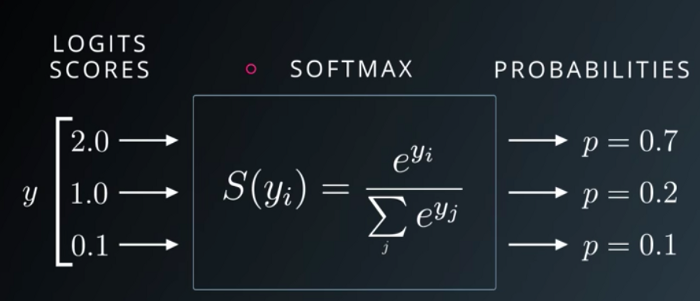

[Softmax link](https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d)

[3.28012589e-04 8.91630661e-04 2.42370342e-03 9.77791748e-01
 3.28012589e-04 1.79088806e-02 3.28012589e-04]


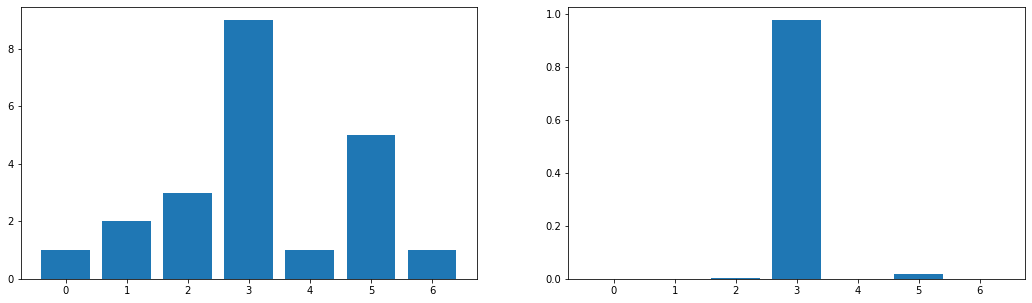

In [8]:
def softmax(x):
    """Compute softmax values of vector x."""
    return  np.exp(x) / np.sum(np.exp(x))

x = np.array([1,2,3,9,1,5,1])
print(softmax(x))

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.bar(range(7), x)

plt.subplot(1,2,2)
plt.bar(range(7), softmax(x))
plt.show()

Para preparar nossa rede para o treinamento, precisamos escolher mais três coisas, como parte da etapa de **compilação**:

1. **Uma função de perda:** para a rede ser capaz de medir o quão bem está indo o treinamento, e assim, fazer as correçõões certas.
2. **Um otimizador:** é o mecanismo pelo qual a rede se atualiza com base nos dados que vê e em sua função de perda (aqui éé onde entra o gradiente).
3. **Métricas para monitorar durante o treinamento**. 

Aqui, nos preocuparemos apenas com a precisão (a fração das imagens que foram classificadas corretamente).

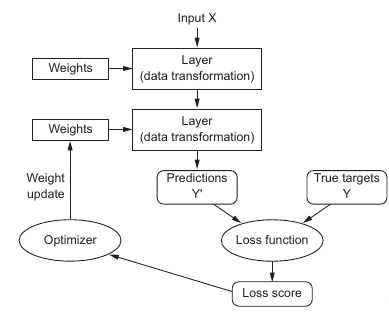

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.01)
network.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


---

Agora preparamos os dados de entrada em formato vetorial

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


---

Agora ajustamos os rótulos para o formato **One-Hot encoder**

| Digits | One-hot  |
|------|------|
|   0  | [**1**, 0, 0, 0, 0, 0, 0, 0, 0, 0]|
|   1  | [0, **1**, 0, 0, 0, 0, 0, 0, 0, 0]|
|   2  | [0, 0, **1**, 0, 0, 0, 0, 0, 0, 0]|
|   3  | [0, 0, 0, **1**, 0, 0, 0, 0, 0, 0]|
|   4  | [0, 0, 0, 0, **1**, 0, 0, 0, 0, 0]|
|   5  | [0, 0, 0, 0, 0, **1**, 0, 0, 0, 0]|
|   6  | [0, 0, 0, 0, 0, 0, **1**, 0, 0, 0]|
|   7  | [0, 0, 0, 0, 0, 0, 0, **1**, 0, 0]|
|   8  | [0, 0, 0, 0, 0, 0, 0, 0, **1**, 0]|
|   9  | [0, 0, 0, 0, 0, 0, 0, 0, 0, **1**]|

In [11]:
from tensorflow.keras.utils import to_categorical


train_labels =  to_categorical(train_labels)
test_labels =  to_categorical(test_labels)



---

Agora estamos prontos para treinar nossa rede. No Keras é feito por meio de uma chamada ao método de **fit**

In [12]:
H = network.fit( train_images, train_labels, epochs=20, batch_size=64 )

Epoch 1/20
938/938 [==============================] - 18s 3ms/step - loss: 1.9574 - accuracy: 0.4944
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 1.0351 - accuracy: 0.8104
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.7137 - accuracy: 0.8449
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5822 - accuracy: 0.8606
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5095 - accuracy: 0.8736
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4619 - accuracy: 0.8806
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4391 - accuracy: 0.8833
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4187 - accuracy: 0.8864
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4052 - accuracy: 0.8880
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3793 - accuracy: 0.895

Duas quantidades estão sendo exibidas durante o treinamento: a **perda** da rede e a **precisão** da rede nos dados de treinamento.

Alcançamos rapidamente uma precisão de 0,989 nos dados de treinamento. 

---

Podemos graficar as curvas de Loss e acurácia:

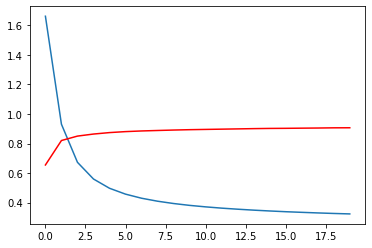

In [14]:
plt.figure()
plt.plot(H.history['loss'])
plt.plot(H.history['accuracy'], c='r')
plt.show()


---

Agora vamos verificar se nosso modelo tem um bom desempenho no conjunto de teste:

In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('\n test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3085 - accuracy: 0.9126

 test_acc: 0.9125999808311462


**agora tudo junto usando Flatten**

In [19]:
import numpy as np
from keras import models, layers, datasets
from tensorflow.keras.utils import to_categorical

#dados
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#rede
network = models.Sequential()
network.add(layers.Flatten(input_shape=(28,28)))
network.add(layers.Dense( 512, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento
H = network.fit(train_images, train_labels, epochs=10, batch_size=128)
# Teste
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('\n test_acc:', test_acc)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.6783 - accuracy: 0.8186
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2421 - accuracy: 0.9280
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1808 - accuracy: 0.9481
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1392 - accuracy: 0.9590
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1171 - accuracy: 0.9659
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0958 - accuracy: 0.9718
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0779 - accuracy: 0.9769
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0641 - accuracy: 0.9809
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0546 - accuracy: 0.9847
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0758 - accuracy: 0.9775

A precisão do nosso conjunto de teste é 86% - um pouco mais baixa do que a precisão do conjunto de treinamento. 

Essa lacuna entre a precisão do treinamento e a precisão do teste é possivelmente um exemplo de **overfitting**, o fato de que os modelos de aprendizado de máquina tendem a ter um desempenho pior em novos dados do que em seus dados de treinamento. 

## Functional API

In [ ]:
inputs = layers.Input(shape=(28, 28), name='in1')
# usando flatten
x = 

out = 

modelito = keras.Model(inputs=[inputs],  outputs = [out])
modelito.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
in1 (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense_28 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_10 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 200)               100200    
_________________________________________________________________
activation_11 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 100)               20100     
_________________________________________________________________
activation_12 (Activation)   (None, 100)             

In [ ]:
modelito.compile( )

#### Treinamento
H = modelito.fit(  ) 



Epoch 1/10
375/375 [==============================] - 6s 17ms/step - loss: 1.0007 - accuracy: 0.7146 - val_loss: 0.3950 - val_accuracy: 0.8984
Epoch 2/10
375/375 [==============================] - 6s 16ms/step - loss: 0.3385 - accuracy: 0.9051 - val_loss: 0.2543 - val_accuracy: 0.9282
Epoch 3/10
375/375 [==============================] - 6s 17ms/step - loss: 0.2385 - accuracy: 0.9324 - val_loss: 0.1897 - val_accuracy: 0.9457
Epoch 4/10
375/375 [==============================] - 6s 16ms/step - loss: 0.1828 - accuracy: 0.9465 - val_loss: 0.1699 - val_accuracy: 0.9521
Epoch 5/10
375/375 [==============================] - 6s 16ms/step - loss: 0.1459 - accuracy: 0.9572 - val_loss: 0.1344 - val_accuracy: 0.9618
Epoch 6/10
375/375 [==============================] - 6s 16ms/step - loss: 0.1211 - accuracy: 0.9646 - val_loss: 0.1340 - val_accuracy: 0.9613
Epoch 7/10
375/375 [==============================] - 6s 16ms/step - loss: 0.1016 - accuracy: 0.9705 - val_loss: 0.1248 - val_accuracy: 0.9647

In [ ]:
#### Teste
test_loss, test_acc = modelito.evaluate( )
print('\n test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1022 - accuracy: 0.9679

 test_acc: 0.9678999781608582
